# Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from aitlas.datasets import Uganda_RGB_Dataset, UgandaDataset
from aitlas.models import DeepLabV3, DeepLabV3_8bands
from aitlas.transforms import Transponse
from aitlas.utils import image_loader

## Visualize images and masks

Total number of patches: 7358


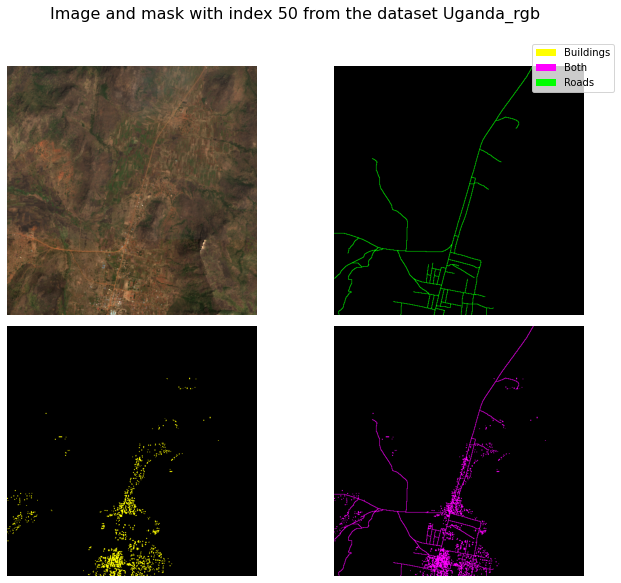

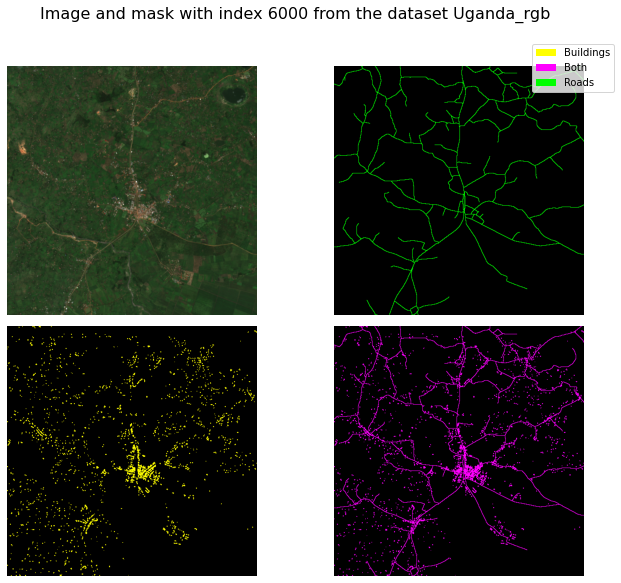

In [20]:
dataset_config = {
    "data_dir": "z:\samples_Uganda_v1_training",
    "transforms": ["aitlas.transforms.Transponse"]
}
dataset = Uganda_RGB_Dataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(50);
dataset.show_image(6000);

## Load train data

In [5]:
train_dataset_config = {
    "batch_size": 2,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "z:\samples_Uganda_v1_training",
    "transforms": ["aitlas.transforms.Transponse"]
}
train_dataset = Uganda_RGB_Dataset(train_dataset_config)
len(train_dataset)

7358

## Create the model

In [6]:
epochs = 5
model_directory = "z:\\trained_models\\ceois2_rgb01\\"
model_config = {
    "num_classes": 3, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5
}

model = DeepLabV3(model_config)
model.prepare()

## Predictions

In [25]:
model_path = "z:\\trained_models\\ceois2_rgb02\\checkpoint.pth.tar"
#labels = ChactunDataset.labels
labels = ["Buildings", "Both", "Roads"]
transform = Transponse()
model.load_model(model_path)

image = image_loader('z:\\samples_Uganda_v1_predict_2\\0330_Kampala_20170125.tiff')
fig = model.predict_masks(image, labels, transform)

# image = image_loader('/media/ssd/chactun_new/predict/tile_1763_lidar.tif')
# fig = model.predict_masks(image, labels, transform)

# image = image_loader('/media/ssd/chactun_new/predict/tile_1730_lidar.tif')
# fig = model.predict_masks(image, labels, transform)

# image = image_loader('/media/ssd/chactun_new/predict/tile_1724_lidar.tif')
# fig = model.predict_masks(image, labels, transform)

2022-02-03 10:55:05,025 INFO Loading checkpoint z:\trained_models\ceois2_rgb02\checkpoint.pth.tar
2022-02-03 10:55:12,606 INFO Loaded checkpoint z:\trained_models\ceois2_rgb02\checkpoint.pth.tar at epoch 51


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[1, 8, 512, 512] to have 3 channels, but got 8 channels instead